<a href="https://colab.research.google.com/github/Girisha-Malni-builds01/Quantum-NLP-/blob/main/QNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q qiskit qiskit-aer matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.2 MB/s eta 0:00:00


In [3]:

import numpy as np, matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
plt.style.use("default")

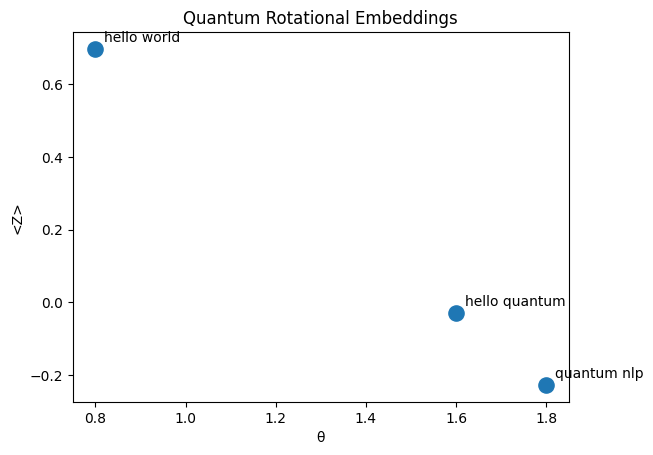

QFIM approx: [0.514599761177071, 0.9483792078259888, 0.9991473878143199]


In [8]:
sentences = ["hello world", "quantum nlp", "hello quantum"]
vocab = {"hello":0,"world":1,"quantum":2,"nlp":3}
X = np.array([[s.split().count(w) for w in vocab] for s in sentences])
θ = (X @ np.array([0.6,0.2,1.0,0.8])) % (2*np.pi)

def f(t):
    qc=QuantumCircuit(1); qc.ry(t,0)
    ψ=Statevector.from_instruction(qc).data
    return float(np.real(np.conj(ψ) @ np.array([[1,0],[0,-1]]) @ ψ))
z = np.array([f(t) for t in θ])

plt.scatter(θ, z, s=120)
for i,s in enumerate(sentences): plt.text(θ[i]+0.02, z[i]+0.02, s)
plt.xlabel("θ"); plt.ylabel("<Z>"); plt.title("Quantum Rotational Embeddings")
plt.show()

def qfim(t,eps=1e-6): return ((f(t+eps)-f(t-eps))/(2*eps))**2
print("QFIM approx:", [qfim(t) for t in θ])

In [9]:
!pip install -q qiskit qiskit-aer matplotlib numpy
import numpy as np, matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
plt.style.use("default")


In [10]:
user_sentence = input("Enter a sentence: ").lower()

sentences = [
    "hello world",
    "quantum nlp",
    "hello quantum",
    user_sentence
]


Enter a sentence: hello world


In [11]:

all_words = sorted(list({w for s in sentences for w in s.split()}))
vocab = {w:i for i,w in enumerate(all_words)}

X = np.array([[s.split().count(w) for w in vocab] for s in sentences])


In [12]:
W = np.linspace(0.3, 1.0, len(vocab))
θ = (X @ W) % (2*np.pi)

In [13]:
def embed_feature(t):
    qc = QuantumCircuit(1)
    qc.ry(float(t), 0)
    ψ = Statevector.from_instruction(qc).data
    Z = np.array([[1,0],[0,-1]])
    return float(np.real(np.conj(ψ) @ Z @ ψ))

z = np.array([embed_feature(t) for t in θ])


**Approximate QFIM**

In [14]:
def qfim_scalar(t, eps=1e-6):
    return ((embed_feature(t+eps) - embed_feature(t-eps)) / (2*eps))**2

qfim_vals = np.array([qfim_scalar(t) for t in θ])
print("QFIM values:", np.round(qfim_vals, 6))


QFIM values: [0.928444 0.928444 0.766667 0.928444]


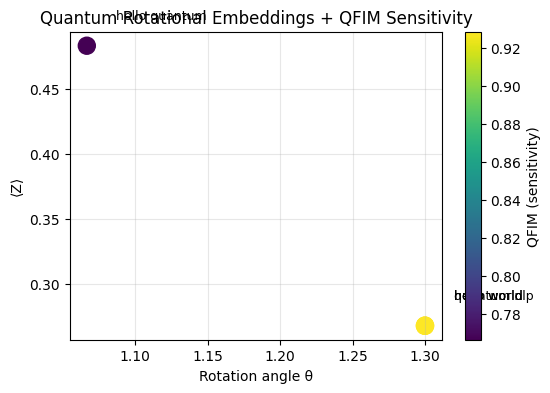

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(θ, z, s=150, c=qfim_vals, cmap="viridis")
for i,s in enumerate(sentences):
    plt.text(θ[i]+0.02, z[i]+0.02, s, fontsize=9)

plt.colorbar(label="QFIM (sensitivity)")
plt.xlabel("Rotation angle θ")
plt.ylabel("⟨Z⟩")
plt.title("Quantum Rotational Embeddings + QFIM Sensitivity")
plt.grid(alpha=0.3)
plt.show()
